## Визуальный анализ данных
После того как мы произвели подготовку и очистку данных, можно приступать к визаульному анализу данных. Будем, в основном, на распределение целевой переменной в зависимости от признаков, посмотрим какие признаки являются сильными, слабыми, а какие не влияют на целевую переменную и будут лишь мешать построению хорошей предсказательной модели. Возможно, анализ поможет нам в последствии создать новые качественные признаки и улучшить модель.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
pd.set_option('precision', 2)
plt.rcParams['figure.figsize'] = (15, 8)

In [3]:
df = pd.read_csv('../data/preprocessed_auto_ru_df.csv', index_col=False)

### Распределение целевого признака

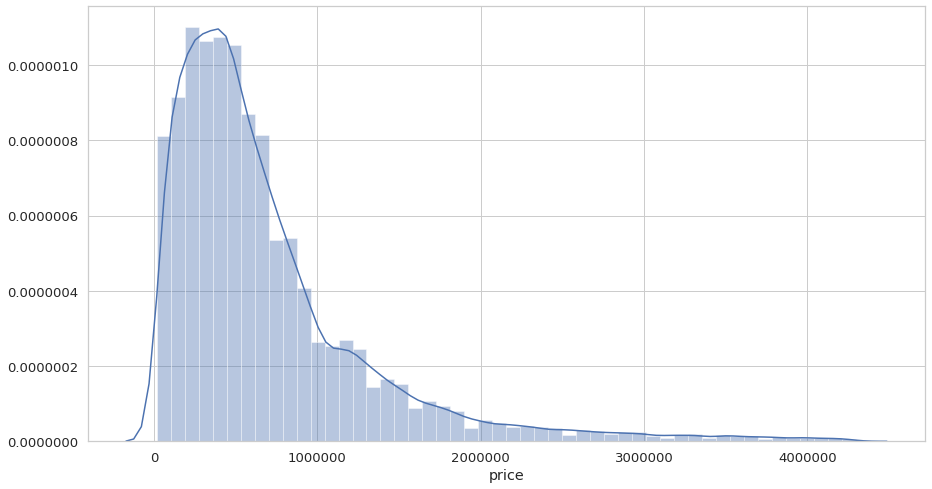

In [4]:
sns.distplot(df[(df['price']<df['price'].quantile(.99))]['price']);

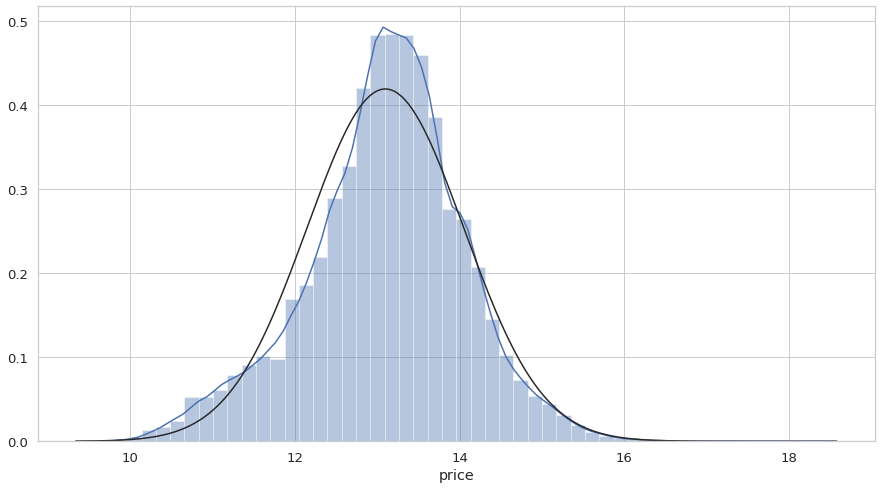

In [5]:
sns.distplot(df['price'].map(np.log), fit=st.norm);

Распределение целевого признака визуально близко к логнормальному

### Распределения наблюдений по категориям

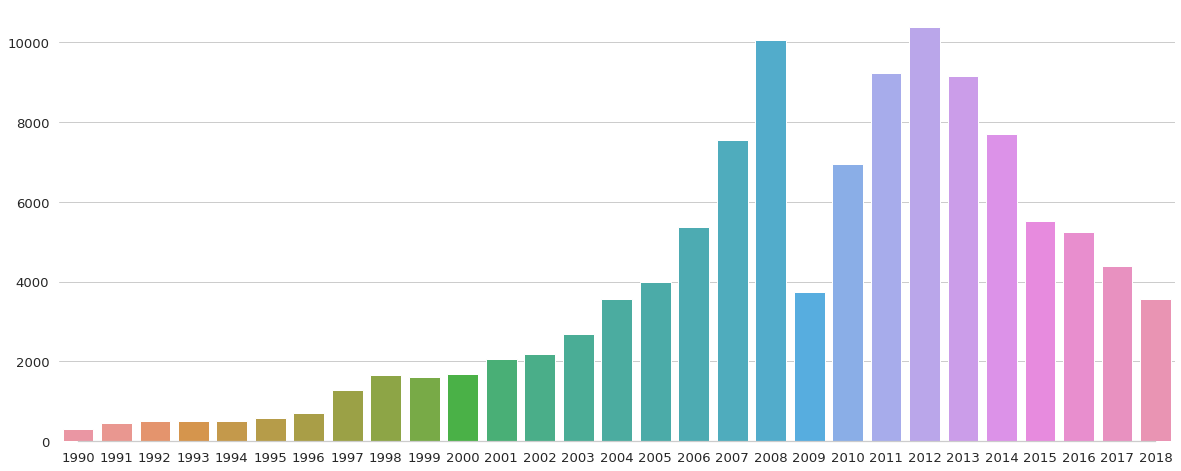

In [6]:
f, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='year', data=df);
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)

В распределении объявлений по году выпуска автомобиля явно наблюдается спад продаж новых автомобилей в 2009-2011 годах, вероятно, связанный с мировым финансовым кризисом

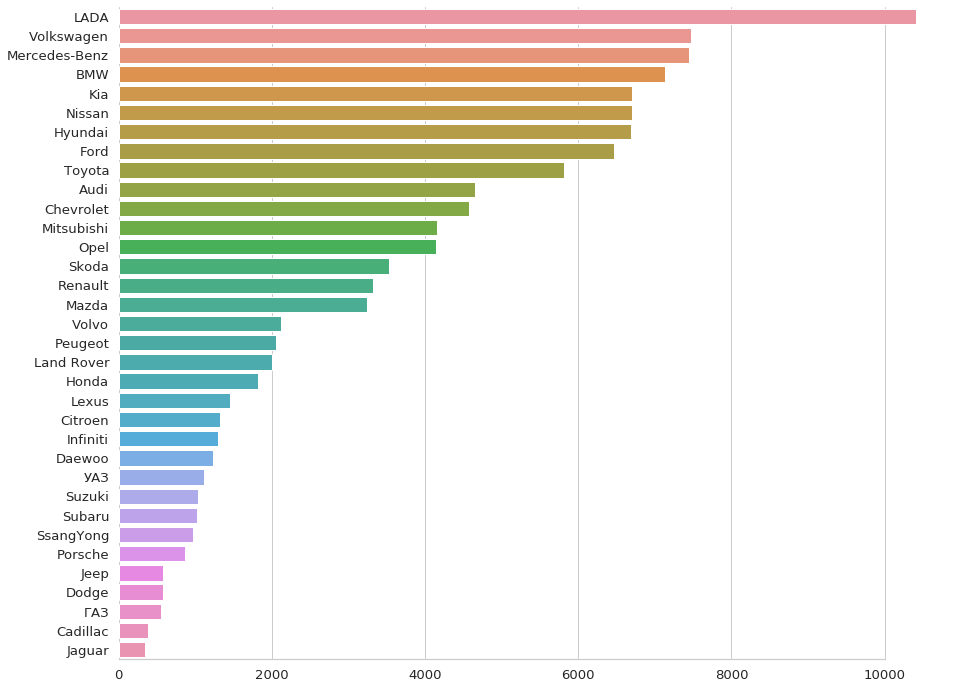

In [7]:
f, ax = plt.subplots(figsize=(15,12))
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index);
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)

Самые распространенные производители автомобилей: 
 - Lada 
 - Volkswagen
 - Mercedes-Benz 
 - BMW
 - Kia

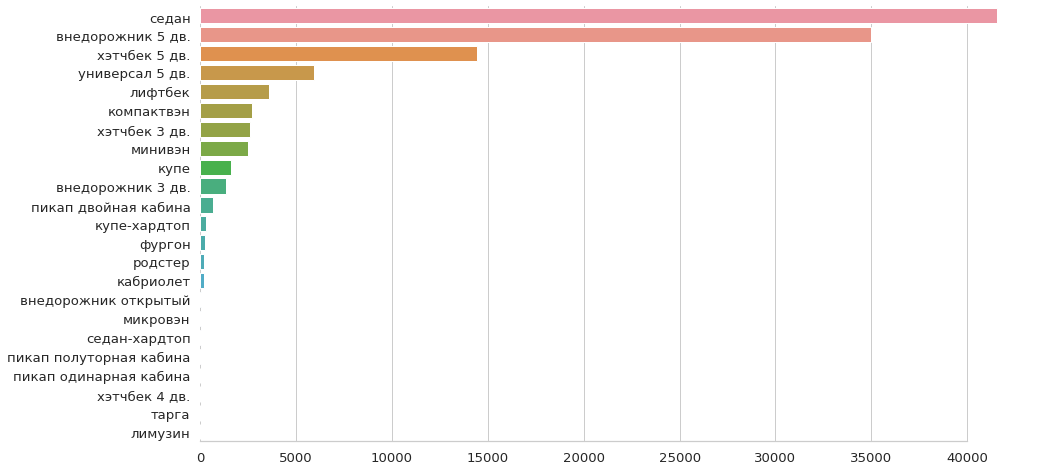

In [8]:
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y=df['body'], data=df, order=df['body'].value_counts().index);
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)

Самые распространенные формы кузова автомобилей: 
 - Седан 
 - Внедорожник 
 - Хэтчбек

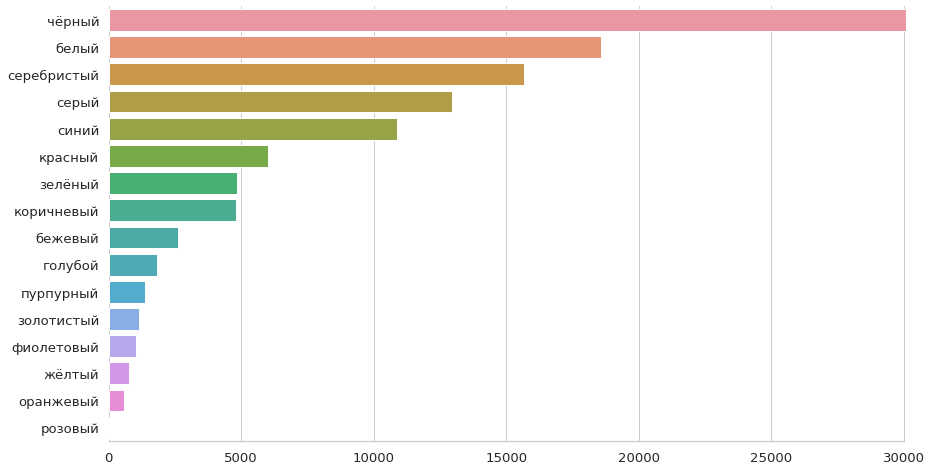

In [9]:
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y=df['color'], data=df, order=df['color'].value_counts().index);
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)

Самые распространенные цвета кузова автомобилей:
 - Черный
 - Белый
 - Серебристый
 - Серый 
 - Синий

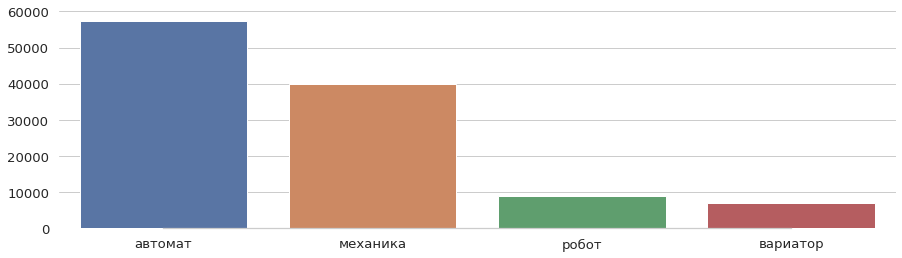

In [10]:
f, ax = plt.subplots(figsize=(15,4))
sns.countplot(x='transmission', data=df, order=df['transmission'].value_counts().index);
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)

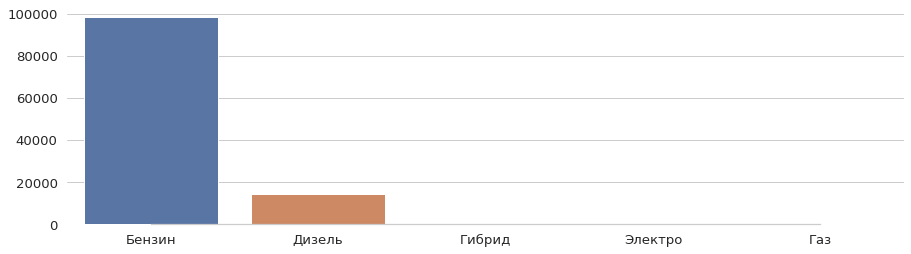

In [11]:
f, ax = plt.subplots(figsize=(15,4))
sns.countplot(x='gas', data=df, order=df['gas'].value_counts().index);
ax.set(ylabel="")
ax.set(xlabel="")
sns.despine(trim=True, left=True)

### Статистическая оценка по категориям

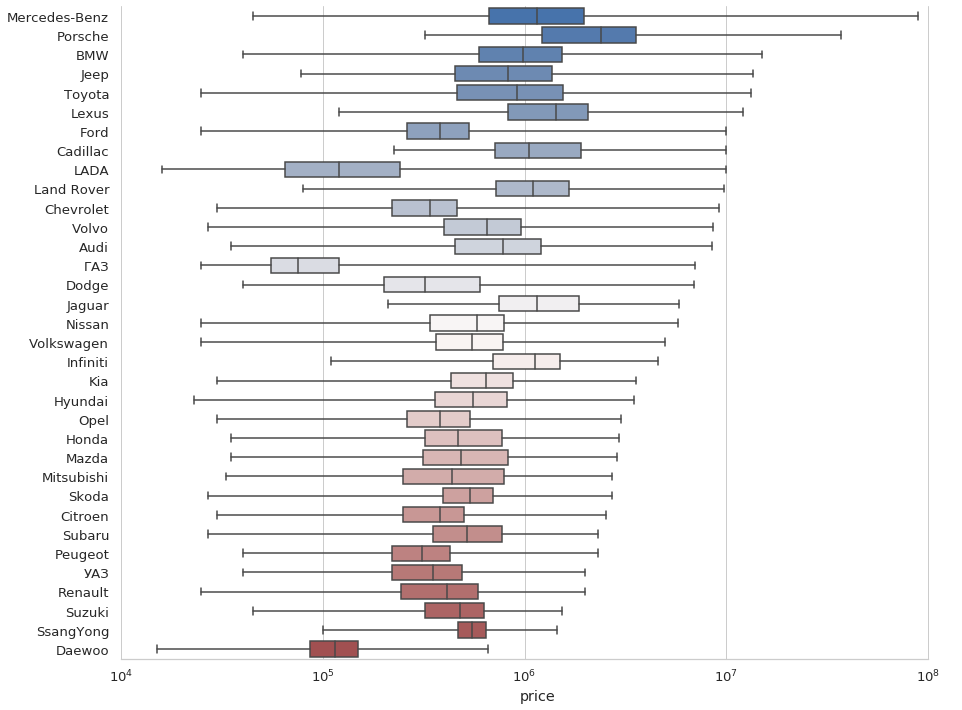

In [12]:
f, ax = plt.subplots(figsize=(15, 12))
ax.set_xscale("log")
sns.boxplot(x="price", y="manufacturer", data=df.sort_values('price', ascending=False),
            whis="range", palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

* Наиболее дорогие автомобили были произведены маркой Mercedes-Benz, однако, если брать медианные показатели, то самый дорогой бренд Porsche
* Медианные данные премиальных брендов расположены довольно близко, исключение составляют Lexus и Porsche

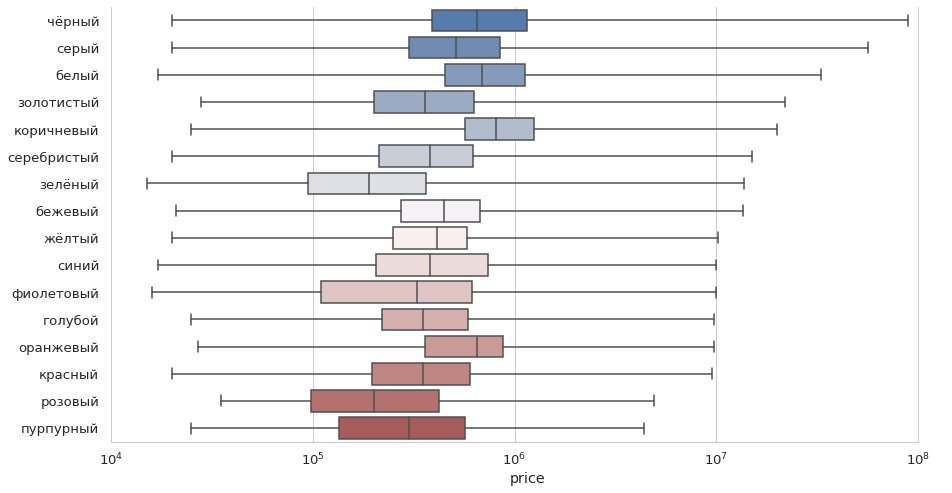

In [13]:
f, ax = plt.subplots(figsize=(15, 8))
ax.set_xscale("log")
sns.boxplot(x="price", y="color", data=df.sort_values('price', ascending=False),
            whis="range", palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Наиболее дорогие автомобили, исходя из цвета кузова - черного цвета. Довольно неожиданно, что по медиане наиболее дорогой цвет - коричневый.

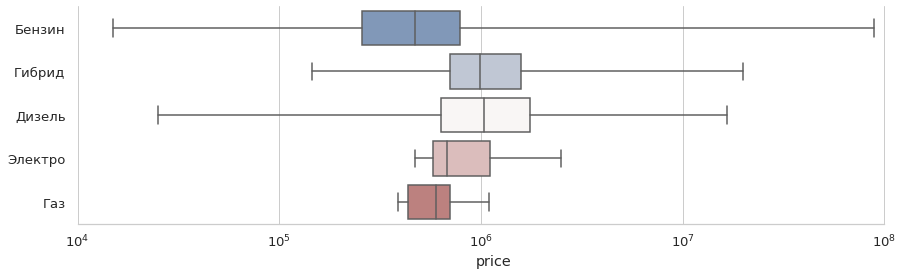

In [14]:
f, ax = plt.subplots(figsize=(15, 4))
ax.set_xscale("log")
sns.boxplot(x="price", y="gas", data=df.sort_values('price', ascending=False),
            whis="range", palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Наиболее дорогие автомобили по типу двигателя, если брать медиану - дизельные, вероятно из-за того, что бюджетные модели редко бывают дизельными.

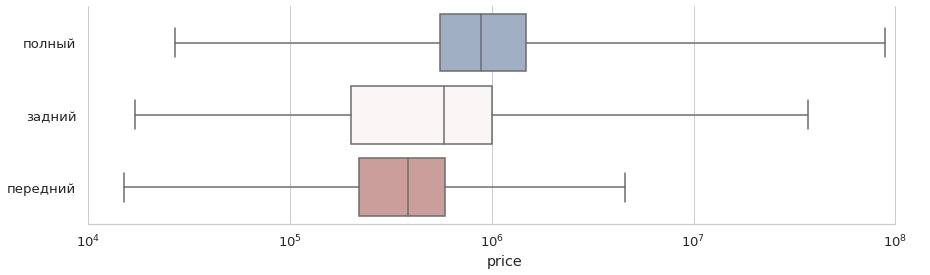

In [15]:
f, ax = plt.subplots(figsize=(15, 4))
ax.set_xscale("log")
sns.boxplot(x="price", y="drive", data=df.sort_values('price', ascending=False),
            whis="range", palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Полный привод существенно повышает стоимость автомобиля на вторичном рынке. Задний привод так же повышает стоимость автомобиля.

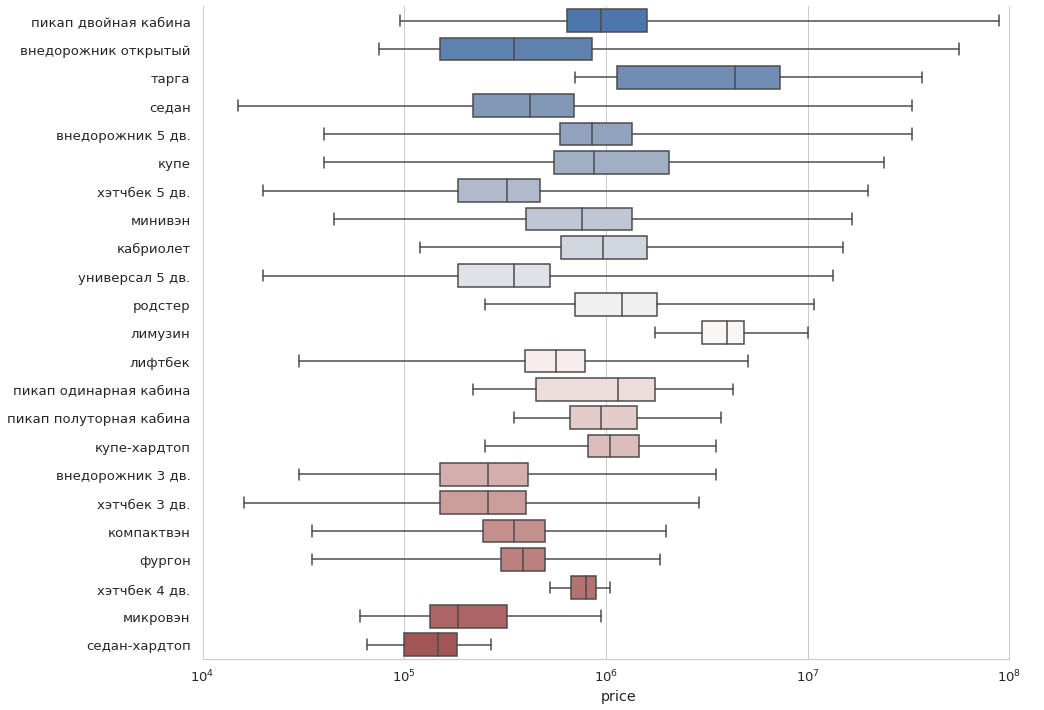

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
ax.set_xscale("log")
sns.boxplot(x="price", y="body", data=df.sort_values('price', ascending=False),
            whis="range", palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

По форме кузова самыми дорогими автомобилями являются редкие варианты:
 - Тарга
 - Лимузин
 - Родстер
 - Кабриолет
 - Пикап

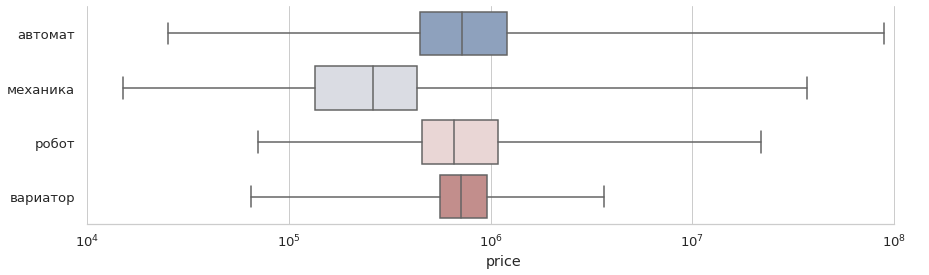

In [17]:
f, ax = plt.subplots(figsize=(15, 4))
ax.set_xscale("log")
sns.boxplot(x="price", y="transmission", data=df.sort_values('price', ascending=False),
            whis="range", palette="vlag")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Автомобили с механикой очевидно дешевле автомобилей с автоматом, роботом и вариатором

### Попарные корреляции и распределения признаков

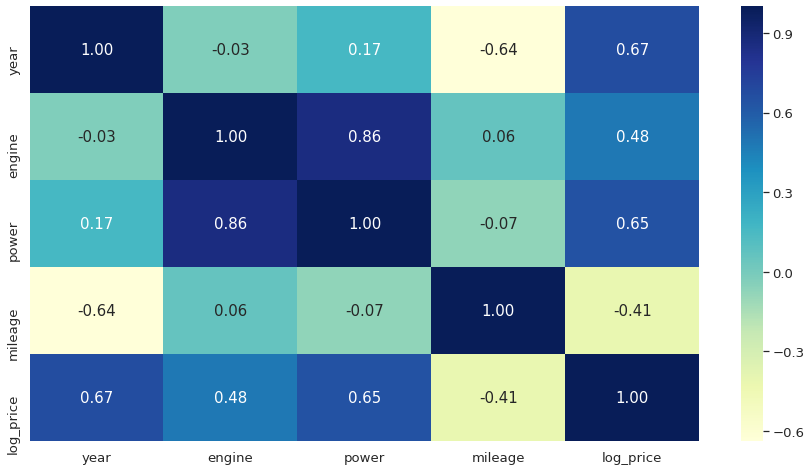

In [18]:
plt.figure(figsize=(15, 8))
df['log_price'] = df['price'].apply(lambda x: np.log(x))
corr_matrix=df[['year', 'engine', 'power', 'mileage', 'log_price']].corr()
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cbar = True, cmap="YlGnBu", annot_kws={"size":15});

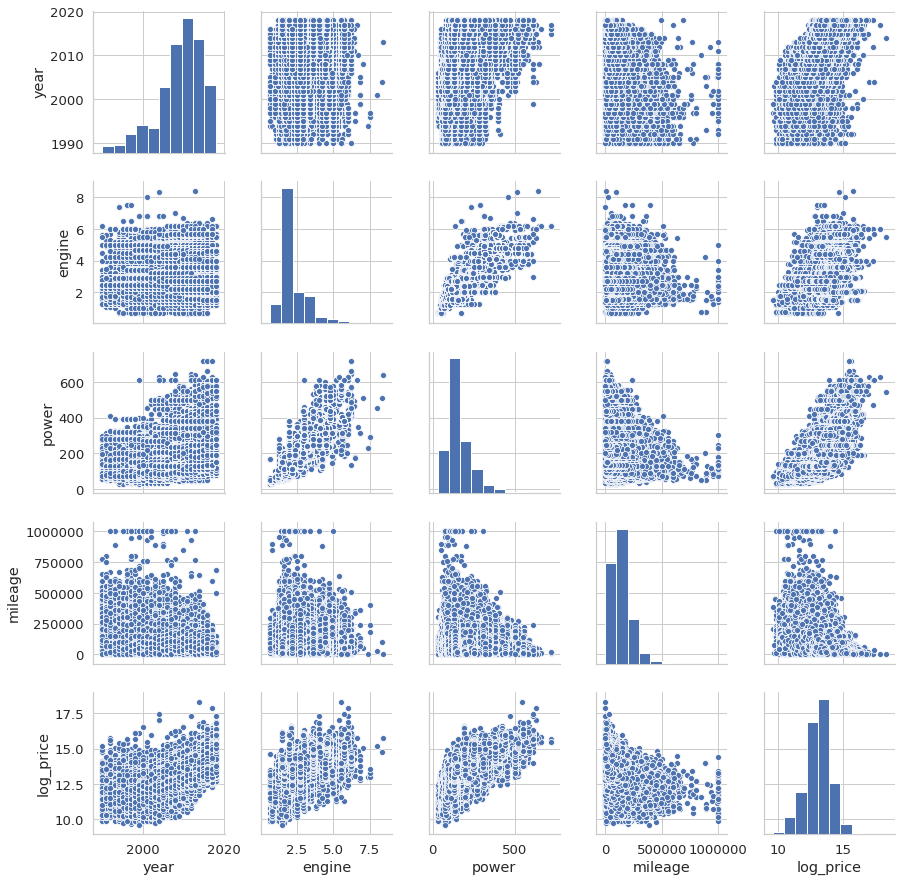

In [19]:
sns.pairplot(df[['year', 'engine', 'power', 'mileage', 'log_price']]);

Посмотрим на некоторые графики поближе

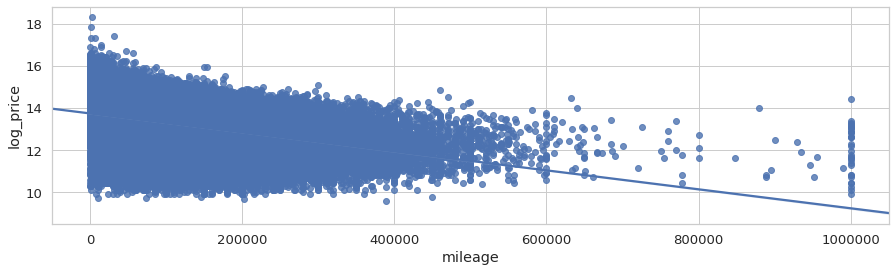

In [20]:
f, ax = plt.subplots(figsize=(15, 4))
sns.regplot(x='mileage', y='log_price', data=df, ax=ax);

Цена уменьшается с увеличение пробега

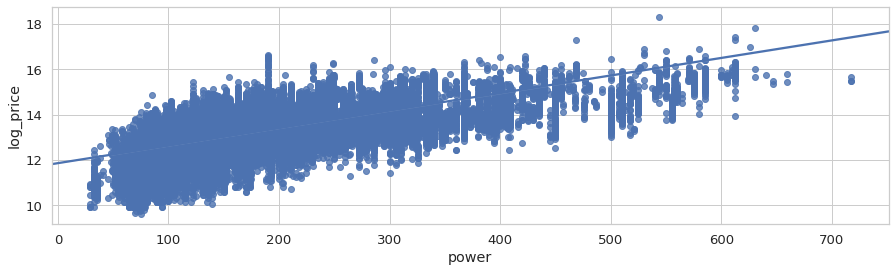

In [21]:
f, ax = plt.subplots(figsize=(15, 4))
sns.regplot(x='power', y='log_price', data=df, ax=ax);

Цена на более мощные автомобили - выше

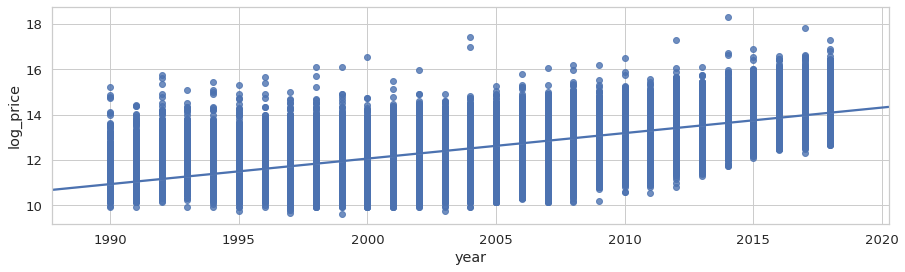

In [22]:
f, ax = plt.subplots(figsize=(15, 4))
sns.regplot(x='year', y='log_price', data=df, ax=ax);

Цена на более старые автомобили - ниже

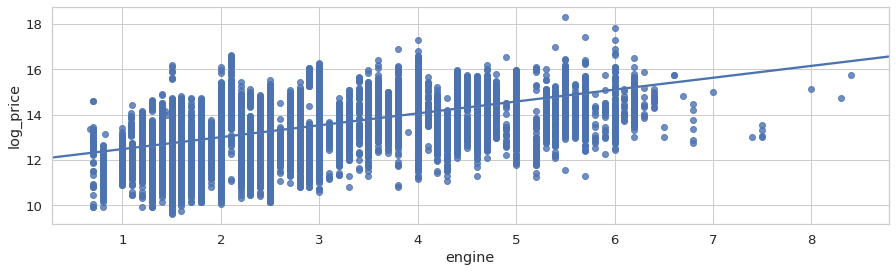

In [23]:
f, ax = plt.subplots(figsize=(15, 4))
sns.regplot(x='engine', y='log_price', data=df, ax=ax);

Цена растет с увеличением объема двигателя